# SSD512 Inference Tutorial

This is a brief tutorial that shows how to use a trained SSD512 for inference on the Pascal VOC datasets. It is the same as the SSD300 inference tutorial but with all parameters preset for SSD512 for Pascal VOC. If you'd like more detailed explanations on how to use the model generally, please refer to [`ssd300_training.ipynb`](https://github.com/pierluigiferrari/ssd_keras/blob/master/ssd300_training.ipynb)

In [1]:
!pip install imageio

    100% |████████████████████████████████| 3.3MB 9.2MB/s 
  Running setup.py bdist_wheel for imageio ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/e0/43/31/605de9372ceaf657f152d3d5e82f42cf265d81db8bbe63cde1
Successfully built imageio


In [3]:
from google.colab import files
uploaded = files.upload()

Saving ssd_keras-master.zip to ssd_keras-master.zip


In [4]:
!unzip ssd_keras-master.zip

Archive:  ssd_keras-master.zip
3ac9adaf3889f1020d74b0eeefea281d5e82f353
   creating: ssd_keras-master/
 extracting: ssd_keras-master/.gitattributes  
   creating: ssd_keras-master/.github/
  inflating: ssd_keras-master/.github/stale.yml  
  inflating: ssd_keras-master/.gitignore  
  inflating: ssd_keras-master/CONTRIBUTING.md  
  inflating: ssd_keras-master/ISSUE_TEMPLATE.md  
  inflating: ssd_keras-master/LICENSE.txt  
  inflating: ssd_keras-master/README.md  
 extracting: ssd_keras-master/__init__.py  
   creating: ssd_keras-master/bounding_box_utils/
 extracting: ssd_keras-master/bounding_box_utils/__init__.py  
  inflating: ssd_keras-master/bounding_box_utils/bounding_box_utils.py  
   creating: ssd_keras-master/data_generator/
 extracting: ssd_keras-master/data_generator/__init__.py  
  inflating: ssd_keras-master/data_generator/data_augmentation_chain_constant_input_size.py  
  inflating: ssd_keras-master/data_generator/data_augmentation_chain_original_ssd.py  
  inflating: ssd_k

In [0]:
!rm -r ./models

In [0]:
!mv -f ssd_keras-master/* .

In [6]:
!ls

819F82E4-C04C-47EC-81FB-3C8F5E959C3E.jpg  LICENSE.txt
adc.json				  misc_utils
bounding_box_utils			  models
cats					  README.md
cats.zip				  sample_data
CONTRIBUTING.md				  ssd300_evaluation_COCO.ipynb
data_generator				  ssd300_evaluation.ipynb
DCGAN					  ssd300_inference.ipynb
eval_utils				  ssd300_training.ipynb
examples				  ssd512_inference.ipynb
ganmodels				  ssd7_training.ipynb
images					  ssd_encoder_decoder
__init__.py				  ssd_keras-master
ISSUE_TEMPLATE.md			  ssd_keras-master.zip
keras_layers				  training_summaries
keras_loss_function			  weight_sampling_tutorial.ipynb


In [7]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar

--2018-10-25 06:01:41--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  5.23MB/s    in 6m 33s  

2018-10-25 06:08:15 (4.85 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

--2018-10-25 06:08:16--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/x-tar]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[========

In [8]:
!tar -xvf VOCtest_06-Nov-2007.tar

VOCdevkit/
VOCdevkit/VOC2007/
VOCdevkit/VOC2007/Annotations/
VOCdevkit/VOC2007/Annotations/000001.xml
VOCdevkit/VOC2007/Annotations/000002.xml
VOCdevkit/VOC2007/Annotations/000003.xml
VOCdevkit/VOC2007/Annotations/000004.xml
VOCdevkit/VOC2007/Annotations/000006.xml
VOCdevkit/VOC2007/Annotations/000008.xml
VOCdevkit/VOC2007/Annotations/000010.xml
VOCdevkit/VOC2007/Annotations/000011.xml
VOCdevkit/VOC2007/Annotations/000013.xml
VOCdevkit/VOC2007/Annotations/000014.xml
VOCdevkit/VOC2007/Annotations/000015.xml
VOCdevkit/VOC2007/Annotations/000018.xml
VOCdevkit/VOC2007/Annotations/000022.xml
VOCdevkit/VOC2007/Annotations/000025.xml
VOCdevkit/VOC2007/Annotations/000027.xml
VOCdevkit/VOC2007/Annotations/000028.xml
VOCdevkit/VOC2007/Annotations/000029.xml
VOCdevkit/VOC2007/Annotations/000031.xml
VOCdevkit/VOC2007/Annotations/000037.xml
VOCdevkit/VOC2007/Annotations/000038.xml
VOCdevkit/VOC2007/Annotations/000040.xml
VOCdevkit/VOC2007/Annotations/000043.xml
VOCdevkit/VOC2007/Annotations/000045.

In [9]:
!tar -xvf VOCtrainval_06-Nov-2007.tar

VOCdevkit/
VOCdevkit/VOC2007/
VOCdevkit/VOC2007/Annotations/
VOCdevkit/VOC2007/Annotations/000005.xml
VOCdevkit/VOC2007/Annotations/000007.xml
VOCdevkit/VOC2007/Annotations/000009.xml
VOCdevkit/VOC2007/Annotations/000012.xml
VOCdevkit/VOC2007/Annotations/000016.xml
VOCdevkit/VOC2007/Annotations/000017.xml
VOCdevkit/VOC2007/Annotations/000019.xml
VOCdevkit/VOC2007/Annotations/000020.xml
VOCdevkit/VOC2007/Annotations/000021.xml
VOCdevkit/VOC2007/Annotations/000023.xml
VOCdevkit/VOC2007/Annotations/000024.xml
VOCdevkit/VOC2007/Annotations/000026.xml
VOCdevkit/VOC2007/Annotations/000030.xml
VOCdevkit/VOC2007/Annotations/000032.xml
VOCdevkit/VOC2007/Annotations/000033.xml
VOCdevkit/VOC2007/Annotations/000034.xml
VOCdevkit/VOC2007/Annotations/000035.xml
VOCdevkit/VOC2007/Annotations/000036.xml
VOCdevkit/VOC2007/Annotations/000039.xml
VOCdevkit/VOC2007/Annotations/000041.xml
VOCdevkit/VOC2007/Annotations/000042.xml
VOCdevkit/VOC2007/Annotations/000044.xml
VOCdevkit/VOC2007/Annotations/000046.

In [10]:
!tar -xvf VOCtrainval_11-May-2012.tar

VOCdevkit/
VOCdevkit/VOC2012/
VOCdevkit/VOC2012/Annotations/
VOCdevkit/VOC2012/Annotations/2007_000027.xml
VOCdevkit/VOC2012/Annotations/2007_000032.xml
VOCdevkit/VOC2012/Annotations/2007_000033.xml
VOCdevkit/VOC2012/Annotations/2007_000039.xml
VOCdevkit/VOC2012/Annotations/2007_000042.xml
VOCdevkit/VOC2012/Annotations/2007_000061.xml
VOCdevkit/VOC2012/Annotations/2007_000063.xml
VOCdevkit/VOC2012/Annotations/2007_000068.xml
VOCdevkit/VOC2012/Annotations/2007_000121.xml
VOCdevkit/VOC2012/Annotations/2007_000123.xml
VOCdevkit/VOC2012/Annotations/2007_000129.xml
VOCdevkit/VOC2012/Annotations/2007_000170.xml
VOCdevkit/VOC2012/Annotations/2007_000175.xml
VOCdevkit/VOC2012/Annotations/2007_000187.xml
VOCdevkit/VOC2012/Annotations/2007_000241.xml
VOCdevkit/VOC2012/Annotations/2007_000243.xml
VOCdevkit/VOC2012/Annotations/2007_000250.xml
VOCdevkit/VOC2012/Annotations/2007_000256.xml
VOCdevkit/VOC2012/Annotations/2007_000272.xml
VOCdevkit/VOC2012/Annotations/2007_000323.xml
VOCdevkit/VOC2012/A

In [0]:
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
from keras.optimizers import Adam
from imageio import imread
import numpy as np
from matplotlib import pyplot as plt

from models.keras_ssd512 import ssd_512
from keras_loss_function.keras_ssd_loss import SSDLoss
from keras_layers.keras_layer_AnchorBoxes import AnchorBoxes
from keras_layers.keras_layer_DecodeDetections import DecodeDetections
from keras_layers.keras_layer_DecodeDetectionsFast import DecodeDetectionsFast
from keras_layers.keras_layer_L2Normalization import L2Normalization

from ssd_encoder_decoder.ssd_output_decoder import decode_detections, decode_detections_fast

from data_generator.object_detection_2d_data_generator import DataGenerator
from data_generator.object_detection_2d_photometric_ops import ConvertTo3Channels
from data_generator.object_detection_2d_geometric_ops import Resize
from data_generator.object_detection_2d_misc_utils import apply_inverse_transforms

%matplotlib inline

In [0]:
# Set the image size.
img_height = 512
img_width = 512

## 1. Load a trained SSD

Either load a trained model or build a model and load trained weights into it. Since the HDF5 files I'm providing contain only the weights for the various SSD versions, not the complete models, you'll have to go with the latter option when using this implementation for the first time. You can then of course save the model and next time load the full model directly, without having to build it.

You can find the download links to all the trained model weights in the README.

### 1.1. Build the model and load trained weights into it

In [13]:
from google.colab import files
uploaded = files.upload()

Saving VGG_VOC0712Plus_SSD_512x512_ft_iter_160000.h5 to VGG_VOC0712Plus_SSD_512x512_ft_iter_160000.h5


In [0]:
# 1: Build the Keras model

K.clear_session() # Clear previous models from memory.

model = ssd_512(image_size=(img_height, img_width, 3),
                n_classes=20,
                mode='inference',
                l2_regularization=0.0005,
                scales=[0.07, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1.05], # The scales for MS COCO are [0.04, 0.1, 0.26, 0.42, 0.58, 0.74, 0.9, 1.06]
                aspect_ratios_per_layer=[[1.0, 2.0, 0.5],
                                         [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                                         [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                                         [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                                         [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                                         [1.0, 2.0, 0.5],
                                         [1.0, 2.0, 0.5]],
               two_boxes_for_ar1=True,
               steps=[8, 16, 32, 64, 128, 256, 512],
               offsets=[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
               clip_boxes=False,
               variances=[0.1, 0.1, 0.2, 0.2],
               normalize_coords=True,
               subtract_mean=[123, 117, 104],
               swap_channels=[2, 1, 0],
               confidence_thresh=0.5,
               iou_threshold=0.45,
               top_k=200,
               nms_max_output_size=400)

# 2: Load the trained weights into the model.

# TODO: Set the path of the trained weights.
weights_path = 'VGG_VOC0712Plus_SSD_512x512_ft_iter_160000.h5'

model.load_weights(weights_path, by_name=True)

# 3: Compile the model so that Keras won't complain the next time you load it.

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

ssd_loss = SSDLoss(neg_pos_ratio=3, alpha=1.0)

model.compile(optimizer=adam, loss=ssd_loss.compute_loss)

In [17]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
identity_layer (Lambda)         (None, 512, 512, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
input_mean_normalization (Lambd (None, 512, 512, 3)  0           identity_layer[0][0]             
__________________________________________________________________________________________________
input_channel_swap (Lambda)     (None, 512, 512, 3)  0           input_mean_normalization[0][0]   
__________________________________________________________________________________________________
conv1_1 (C

Or

### 1.2. Load a trained model

In [0]:
# TODO: Set the path to the `.h5` file of the model to be loaded.
model_path = 'path/to/trained/model.h5'

# We need to create an SSDLoss object in order to pass that to the model loader.
ssd_loss = SSDLoss(neg_pos_ratio=3, n_neg_min=0, alpha=1.0)

K.clear_session() # Clear previous models from memory.

model = load_model(model_path, custom_objects={'AnchorBoxes': AnchorBoxes,
                                               'L2Normalization': L2Normalization,
                                               'DecodeDetections': DecodeDetections,
                                               'compute_loss': ssd_loss.compute_loss})

## 2. Load some images

Load some images for which you'd like the model to make predictions.

In [26]:
from google.colab import files
uploaded = files.upload()

Saving 19_27_16_804296.png to 19_27_16_804296.png


In [0]:
orig_images = [] # Store the images here.
input_images = [] # Store resized versions of the images here.

# We'll only load one image in this example.
#img_path = 'examples/fish_bike.jpg'
#img_path = '0B515D6A-6820-43CC-A52A-FF93204484CC.jpg' #マサトシ
#img_path = '819F82E4-C04C-47EC-81FB-3C8F5E959C3E.jpg' #コーヒー
#img_path = '848F6C24-5490-450F-8B95-EFDC01335D2B.jpg' #ポケモン
#img_path = '7050FC3D-30A8-403E-AEB1-9A01165D3484.jpg' #ニュースクリップ
#img_path = '2734D542-5BD9-4BD5-980A-AEBB95CF4F16.jpg' #猫
#img_path = 'a11_R.jpg' #犬と猫と鳥
#img_path = 'pixta_28299329_M.jpg' #鳥
#img_path = '17_17_34_542626.png'
img_path = '19_27_16_804296.png'

orig_images.append(imread(img_path))
img = image.load_img(img_path, target_size=(img_height, img_width))
img = image.img_to_array(img)
input_images.append(img)
input_images = np.array(input_images)

## 3. Make predictions

In [0]:
y_pred = model.predict(input_images)

`y_pred` contains a fixed number of predictions per batch item (200 if you use the original model configuration), many of which are low-confidence predictions or dummy entries. We therefore need to apply a confidence threshold to filter out the bad predictions. Set this confidence threshold value how you see fit.

In [29]:
confidence_threshold = 0.5

y_pred_thresh = [y_pred[k][y_pred[k,:,1] > confidence_threshold] for k in range(y_pred.shape[0])]

np.set_printoptions(precision=2, suppress=True, linewidth=90)
print("Predicted boxes:\n")
print('   class   conf xmin   ymin   xmax   ymax')
print(y_pred_thresh[0])

Predicted boxes:

   class   conf xmin   ymin   xmax   ymax
[[ 15.     0.98  49.53  11.19 502.35 514.99]]


## 4. Visualize the predictions

We just resized the input image above and made predictions on the distorted image. We'd like to visualize the predictions on the image in its original size though, so below we'll transform the coordinates of the predicted boxes accordingly.

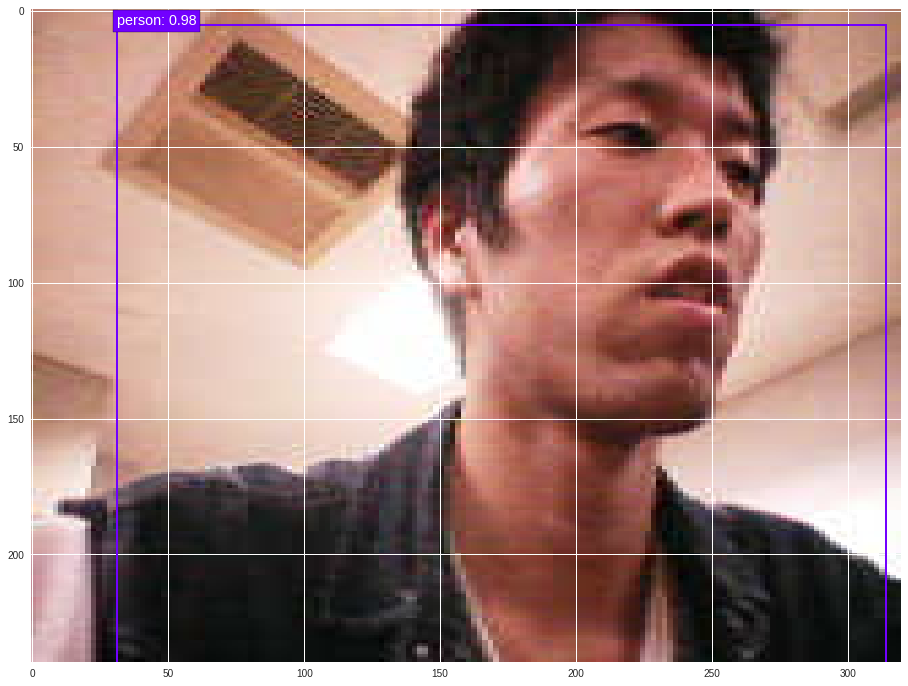

In [30]:
# Display the image and draw the predicted boxes onto it.

# Set the colors for the bounding boxes
colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
classes = ['background',
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat',
           'chair', 'cow', 'diningtable', 'dog',
           'horse', 'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor']

plt.figure(figsize=(20,12))
plt.imshow(orig_images[0])

current_axis = plt.gca()

for box in y_pred_thresh[0]:
    # Transform the predicted bounding boxes for the 512x512 image to the original image dimensions.
    xmin = box[-4] * orig_images[0].shape[1] / img_width
    ymin = box[-3] * orig_images[0].shape[0] / img_height
    xmax = box[-2] * orig_images[0].shape[1] / img_width
    ymax = box[-1] * orig_images[0].shape[0] / img_height
    color = colors[int(box[0])]
    label = '{}: {:.2f}'.format(classes[int(box[0])], box[1])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':color, 'alpha':1.0})

## 5. Make predictions on Pascal VOC 2007 Test

Let's use a `DataGenerator` to make predictions on the Pascal VOC 2007 test dataset and visualize the predicted boxes alongside the ground truth boxes for comparison. Everything here is preset already, but if you'd like to learn more about the data generator and its capabilities, take a look at the detailed tutorial in [this](https://github.com/pierluigiferrari/data_generator_object_detection_2d) repository.

In [0]:
!pip install et_xmlfile

In [9]:
# Create a `BatchGenerator` instance and parse the Pascal VOC labels.

dataset = DataGenerator()

# TODO: Set the paths to the datasets here.

VOC_2007_images_dir         = 'VOCdevkit/VOC2007/JPEGImages/'
VOC_2007_annotations_dir    = 'VOCdevkit/VOC2007/Annotations/'
VOC_2007_test_image_set_filename = 'VOCdevkit/VOC2007/ImageSets/Main/test.txt'

# The XML parser needs to now what object class names to look for and in which order to map them to integers.
classes = ['background',
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat',
           'chair', 'cow', 'diningtable', 'dog',
           'horse', 'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor']

dataset.parse_xml(images_dirs=[VOC_2007_images_dir],
                  image_set_filenames=[VOC_2007_test_image_set_filename],
                  annotations_dirs=[VOC_2007_annotations_dir],
                  classes=classes,
                  include_classes='all',
                  exclude_truncated=False,
                  exclude_difficult=True,
                  ret=False)

convert_to_3_channels = ConvertTo3Channels()
resize = Resize(height=img_height, width=img_width)

generator = dataset.generate(batch_size=1,
                             shuffle=True,
                             transformations=[convert_to_3_channels,
                                              resize],
                             returns={'processed_images',
                                      'filenames',
                                      'inverse_transform',
                                      'original_images',
                                      'original_labels'},
                             keep_images_without_gt=False)

Processing image set 'test.txt': 100%|██████████| 4952/4952 [00:14<00:00, 347.01it/s]


In [10]:
# Generate a batch and make predictions.

batch_images, batch_filenames, batch_inverse_transforms, batch_original_images, batch_original_labels = next(generator)

i = 0 # Which batch item to look at

print("Image:", batch_filenames[i])
print()
print("Ground truth boxes:\n")
print(np.array(batch_original_labels[i]))

Image: VOCdevkit/VOC2007/JPEGImages/008906.jpg

Ground truth boxes:

[[  8 182 164 266 211]]


In [0]:
# Predict.

y_pred = model.predict(batch_images)

In [12]:
confidence_threshold = 0.5

# Perform confidence thresholding.
y_pred_thresh = [y_pred[k][y_pred[k,:,1] > confidence_threshold] for k in range(y_pred.shape[0])]

# Convert the predictions for the original image.
y_pred_thresh_inv = apply_inverse_transforms(y_pred_thresh, batch_inverse_transforms)

np.set_printoptions(precision=2, suppress=True, linewidth=90)
print("Predicted boxes:\n")
print('   class   conf xmin   ymin   xmax   ymax')
print(y_pred_thresh_inv[i])

Predicted boxes:

   class   conf xmin   ymin   xmax   ymax
[[  8.     0.67 184.   158.   269.   237.  ]]


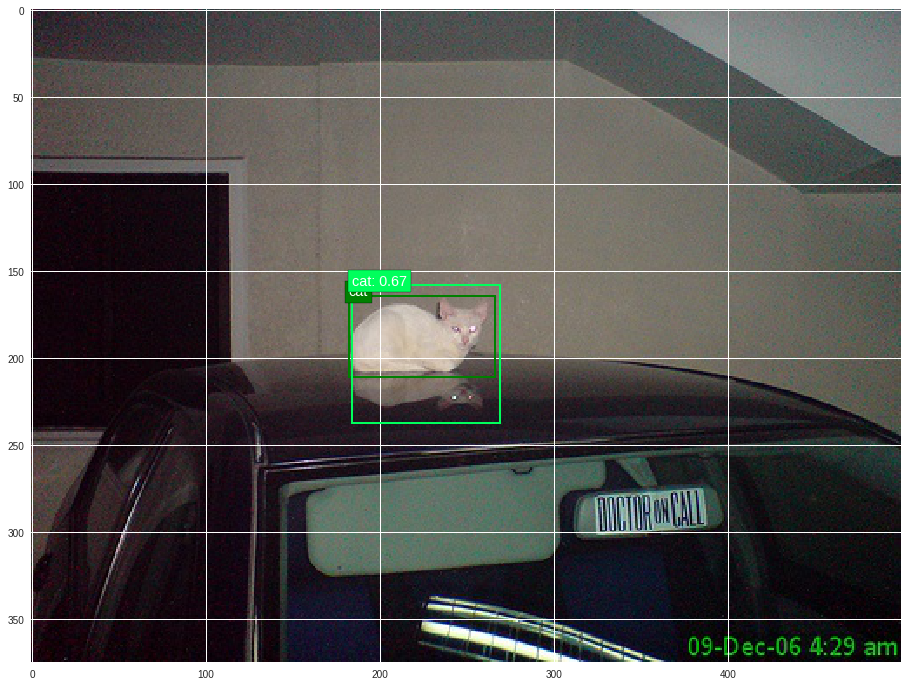

In [13]:
# Display the image and draw the predicted boxes onto it.

# Set the colors for the bounding boxes
colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

plt.figure(figsize=(20,12))
plt.imshow(batch_original_images[i])

current_axis = plt.gca()

for box in batch_original_labels[i]:
    xmin = box[1]
    ymin = box[2]
    xmax = box[3]
    ymax = box[4]
    label = '{}'.format(classes[int(box[0])])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='green', fill=False, linewidth=2))  
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':'green', 'alpha':1.0})

for box in y_pred_thresh_inv[i]:
    xmin = box[2]
    ymin = box[3]
    xmax = box[4]
    ymax = box[5]
    color = colors[int(box[0])]
    label = '{}: {:.2f}'.format(classes[int(box[0])], box[1])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':color, 'alpha':1.0})

In [15]:
!cat VOCdevkit/VOC2007/ImageSets/Main/aeroplane_test.txt

000001 -1
000002 -1
000003 -1
000004 -1
000006 -1
000008 -1
000010 -1
000011 -1
000013 -1
000014 -1
000015 -1
000018 -1
000022 -1
000025 -1
000027 -1
000028 -1
000029 -1
000031 -1
000037 -1
000038 -1
000040 -1
000043 -1
000045 -1
000049 -1
000053 -1
000054 -1
000055 -1
000056 -1
000057 -1
000058 -1
000059 -1
000062 -1
000067  1
000068 -1
000069 -1
000070 -1
000071 -1
000074 -1
000075 -1
000076 -1
000079 -1
000080 -1
000082 -1
000084 -1
000085 -1
000086 -1
000087 -1
000088 -1
000090 -1
000092 -1
000094 -1
000096 -1
000097 -1
000098 -1
000100 -1
000103 -1
000105 -1
000106 -1
000108 -1
000111 -1
000114 -1
000115 -1
000116 -1
000119 -1
000124 -1
000126 -1
000127 -1
000128  1
000135 -1
000136 -1
000137 -1
000139 -1
000144 -1
000145 -1
000148 -1
000149 -1
000151 -1
000152 -1
000155 -1
000157 -1
000160 -1
000166 -1
000167 -1
000168 -1
000172 -1
000175 -1
000176 -1
000178 -1
000179 -1
000181 -1
000182 -1
000183 -1
000185 -1
000186 -1
000188 -1
000191 -1
000195 -1
000196 -1
000197 -1
000199 -1
